# Installing Libraries

In [9]:
pip install pytrends matplotlib seaborn plotly pandas 

Note: you may need to restart the kernel to use updated packages.


# Importing the Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
from pytrends.request import TrendReq

# Pytrends setup , Keyword setup and Data Request

In [11]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = 'cloud computing'
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m', geo ='', gprop ='')
time.sleep(5)

# Countrywise Interest and Bar plot top 15 Countries

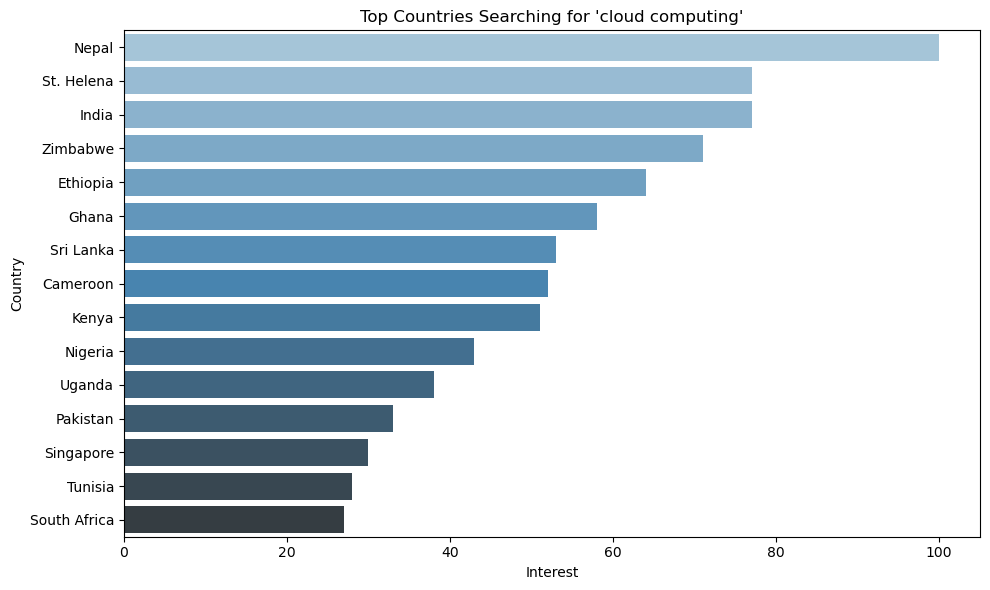

In [12]:

region_data = pytrends.interest_by_region()

top_regions = region_data.sort_values(by=keyword, ascending=False).head(15)
    
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions[keyword], y=top_regions.index, palette='Blues_d')
plt.title(f"Top Countries Searching for '{keyword}'")
plt.xlabel('Interest')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top countries searching for cloud.png')
plt.show()

# World Map

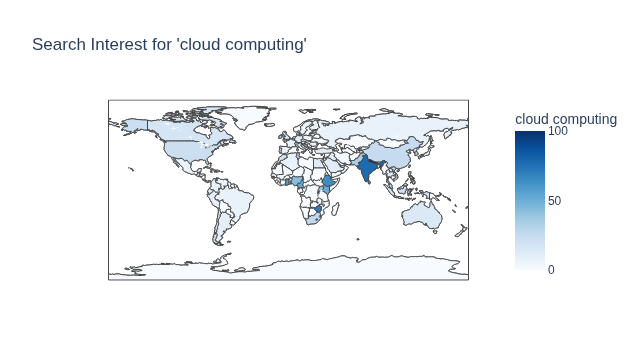

In [15]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                     locations='geoName',
                     locationmode='country names',
                     color=keyword,
                     title=f"Search Interest for '{keyword}' ",
                     color_continuous_scale='Blues')

fig.show()

# Timewise Interest and Line Plot(Search Trend Over Time)

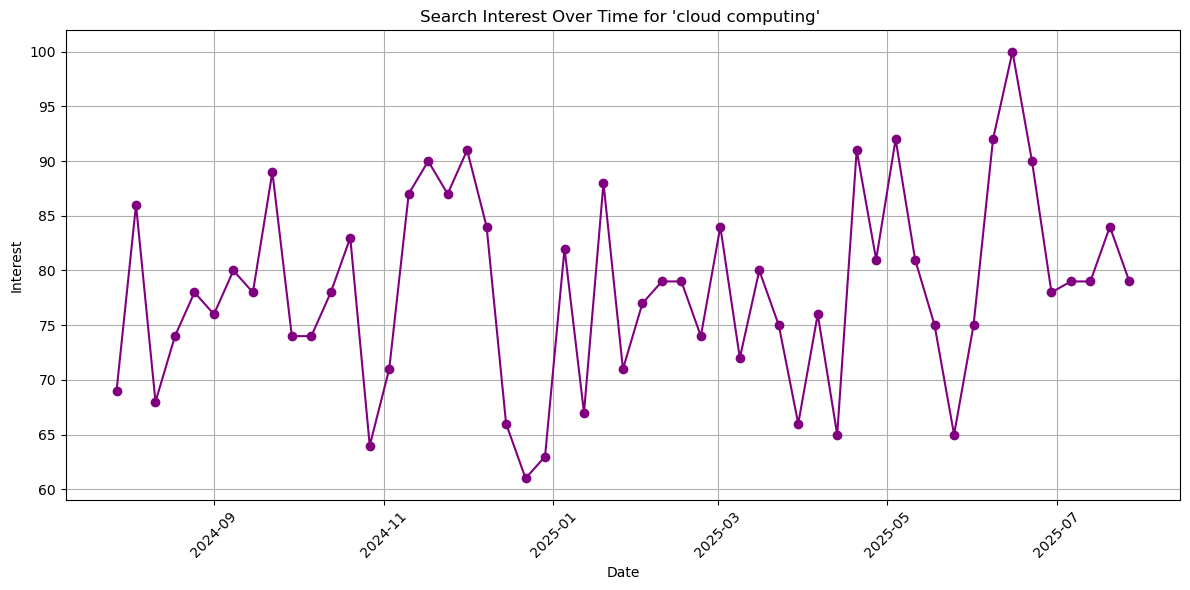

In [17]:
time_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Search interest over time for keyword.png')
plt.show()

# Multiple Keyword Compare and Comparision Plot

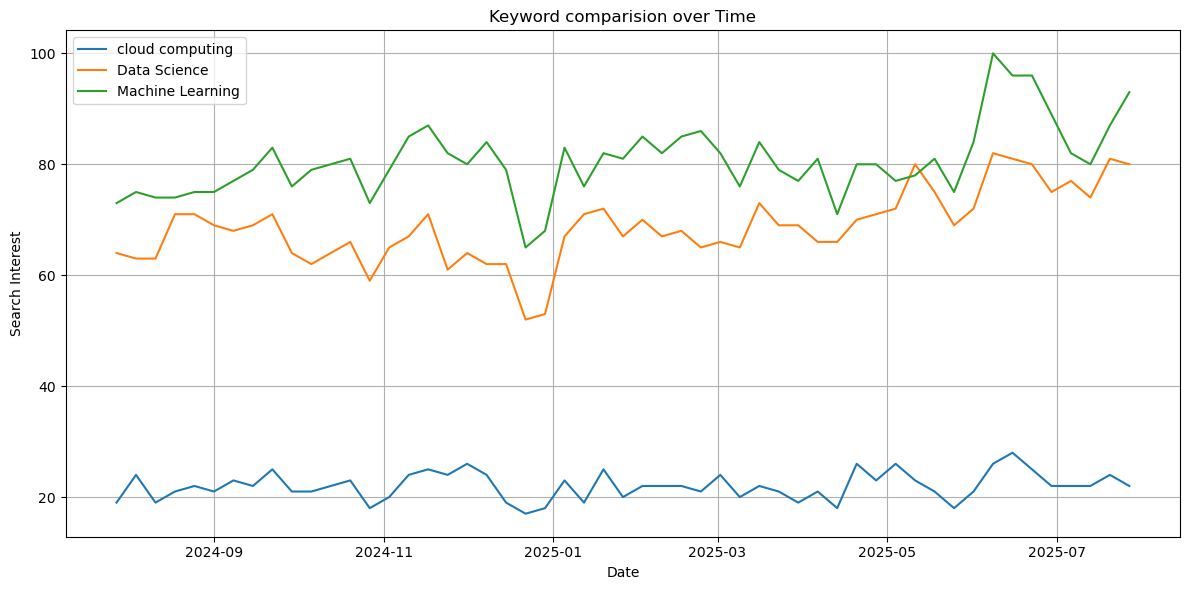

In [18]:
kw_list = ["cloud computing", "Data Science", "Machine Learning"]
pytrends.build_payload(kw_list, cat =0, timeframe='today 12-m', geo='', gprop='')
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)

plt.title('Keyword comparision over Time')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('multiple keyword comparision plot.png')
plt.show()